In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import argparse
import histlite as hl
import csky as cy
import pandas as pd
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord

repo = cy.selections.Repository()
ana_dir = cy.utils.ensure_dir('/home/mkovacevich/FRB_analysis/cascades_ana')

repo = cy.selections.Repository()
ana = cy.analysis.Analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr ,dir=ana_dir)

/home/mkovacevich/py3venv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

In [3]:
data = pd.read_csv('tns_search.csv')
data

,ID,Name,RA,DEC,Obj. Type,Repeater of Primary Burst,DM,DM-Err,DM-Units,Gal. DM Limit,...,Class. Instrument/s,TNS AT,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Ext. catalog/s
0,65013,FRB 20170826A,05:31:58.700,+33:08:52.50,FRB,20121102A,565.0,5.0,pc/cc,188,...,NaN,1,1,NaN,0.38,Other-,2017-08-26 13:52:01.252,FRBCAT_bot,NaN,NaN
1,65012,FRB 20160823A,05:31:58.700,+33:08:53.00,FRB,20121102A,567.0,2.0,pc/cc,188,...,NaN,1,1,NaN,0.00,Other-,2016-08-23 17:51:23.921,FRBCAT_bot,NaN,NaN
2,65011,FRB 20151208A,05:31:58.000,+33:08:04.00,FRB,20121102A,558.6,1.7,pc/cc,188,...,NaN,1,1,NaN,0.03,Other-,2015-12-08 04:54:40.262,FRBCAT_bot,NaN,NaN
3,65010,FRB 20151119D,05:31:58.000,+33:08:04.00,FRB,20121102A,560.0,6.4,pc/cc,188,...,NaN,1,1,NaN,0.09,S-Band-GUPPI,2015-11-19 11:05:52.492,FRBCAT_bot,NaN,NaN
4,65009,FRB 20151119C,05:31:58.000,+33:08:04.00,FRB,20121102A,560.0,NaN,pc/cc,188,...,NaN,1,1,NaN,0.02,S-Band-GUPPI,2015-11-19 10:58:56.234,FRBCAT_bot,NaN,NaN
5,65008,FRB 20151119B,05:31:58.000,+33:08:04.00,FRB,20121102A,568.8,6.6,pc/cc,188,...,NaN,1,1,NaN,0.04,S-Band-GUPPI,2015-11-19 10:51:34.957,FRBCAT_bot,NaN,NaN
6,65007,FRB 20151119A,05:31:58.000,+33:08:04.00,FRB,20121102A,565.1,5.2,pc/cc,188,...,NaN,1,1,NaN,0.06,S-Band-GUPPI,2015-11-19 10:44:40.524,FRBCAT_bot,NaN,NaN
7,65006,FRB 20151113A,05:31:58.000,+33:08:04.00,FRB,20121102A,559.9,7.1,pc/cc,188,...,NaN,1,1,NaN,0.04,S-Band-GUPPI,2015-11-13 08:32:42.375,FRBCAT_bot,NaN,NaN
8,65005,FRB 20150602H,05:31:55.000,+33:08:13.00,FRB,20121102A,556.5,1.1,pc/cc,188,...,NaN,1,1,NaN,0.31,Other-,2015-06-02 17:57:32.020,FRBCAT_bot,NaN,NaN
9,65004,FRB 20150602G,05:31:55.000,+33:08:13.00,FRB,20121102A,558.7,4.9,pc/cc,188,...,NaN,1,1,NaN,0.05,Other-,2015-06-02 17:56:34.787,FRBCAT_bot,NaN,NaN


In [11]:
RA_array = data['RA'].to_numpy()
DEC_array = data['DEC'].to_numpy()
Disc_Data_array = data['Discovery Date (UT)'].to_numpy()

Disc_Data_array_VLA = ['2016-09-02T16:19:00.221', '2016-09-02T16:41:01.770', '2016-09-07T11:59:05.944', '2016-09-12T10:58:30.947', '2016-09-14T10:18:36.232', '2016-09-15T11:11:02.962', '2016-09-17T10:29:09.447', '2016-09-18T10:50:31.802']
RA_VLA_array = np.repeat(82.99458333333334, 8)
DEC_VLA_array = np.repeat(33.1479166666666, 8)

Mod_Disc_Date_array = []
for i in Disc_Data_array:
    x = i.replace(" ","")
    Mod_Disc_Date_array.append(x[:10] + 'T' + x[10:])

RA_degrees = []
for i in RA_array:
    hours = 15*float(i.split(':')[0])
    minutes = (15/60)*float(i.split(':')[1])
    seconds = (15/3600)*float(i.split(':')[2])
    RA_degrees.append(hours+minutes+seconds)

DEC_degrees = []
for i in DEC_array:
    hours = float(i.split(':')[0])
    minutes = (1/60)*float(i.split(':')[1])
    seconds = (1/3600)*float(i.split(':')[2])
    DEC_degrees.append(hours+minutes+seconds)

DEC_deg = np.concatenate((DEC_degrees, DEC_VLA_array))
RA_deg = np.concatenate((RA_degrees, RA_VLA_array))
source_times = np.concatenate((Mod_Disc_Date_array, Disc_Data_array_VLA))

src_t = Time(source_times)


mjd_source_time = src_t.mjd

a = ana.anas[0]

FRB_mjd_time, FRB_ra_rad, FRB_dec_rad, FRB_time_window, good_indices = [],[],[],[],[]


#Now, we are going to simplify the above arrays to only include FRBs that burst during the livetime of MESC 7 yr
for i, time in enumerate(mjd_source_time):
    if float(time) >= min(a.data['mjd']) and float(time) <= max(a.data['mjd']):
        FRB_mjd_time.append(time)
        good_indices.append(i)
        
FRB_ra_rad = [np.radians(RA_deg[i]) for i in good_indices]
FRB_dec_rad = [np.radians(DEC_deg[i]) for i in good_indices]

np.save('/data/user/mkovacevich/FRB_analysis/FRB_121102_mjd.npy', FRB_mjd_time, allow_pickle = True)
np.save('/data/user/mkovacevich/FRB_analysis/FRB_121102_RA.npy', FRB_ra_rad, allow_pickle = True)
np.save('/data/user/mkovacevich/FRB_analysis/FRB_121102_DEC.npy', FRB_dec_rad, allow_pickle = True)

In [3]:
Disc_Data_array = data['Discovery Date (UT)'].to_numpy()

In [4]:
Disc_Data_array

array(['2017-08-26 13:52:01.252', '2016-08-23 17:51:23.921',
       '2015-12-08 04:54:40.262', '2015-11-19 11:05:52.492',
       '2015-11-19 10:58:56.234', '2015-11-19 10:51:34.957',
       '2015-11-19 10:44:40.524', '2015-11-13 08:32:42.375',
       '2015-06-02 17:57:32.020', '2015-06-02 17:56:34.787',
       '2015-06-02 17:53:45.528', '2015-06-02 17:50:39.298',
       '2015-06-02 17:49:41.319', '2015-06-02 17:49:18.627',
       '2015-06-02 16:47:36.484', '2015-06-02 16:38:07.575',
       '2015-05-17 17:51:40.921', '2015-05-17 17:42:08.712',
       '2012-11-02 06:35:53.244'], dtype=object)

In [5]:
data['Discovery Date (UT)']

0     2017-08-26 13:52:01.252
1     2016-08-23 17:51:23.921
2     2015-12-08 04:54:40.262
3     2015-11-19 11:05:52.492
4     2015-11-19 10:58:56.234
5     2015-11-19 10:51:34.957
6     2015-11-19 10:44:40.524
7     2015-11-13 08:32:42.375
8     2015-06-02 17:57:32.020
9     2015-06-02 17:56:34.787
10    2015-06-02 17:53:45.528
11    2015-06-02 17:50:39.298
12    2015-06-02 17:49:41.319
13    2015-06-02 17:49:18.627
14    2015-06-02 16:47:36.484
15    2015-06-02 16:38:07.575
16    2015-05-17 17:51:40.921
17    2015-05-17 17:42:08.712
18    2012-11-02 06:35:53.244
Name: Discovery Date (UT), dtype: object

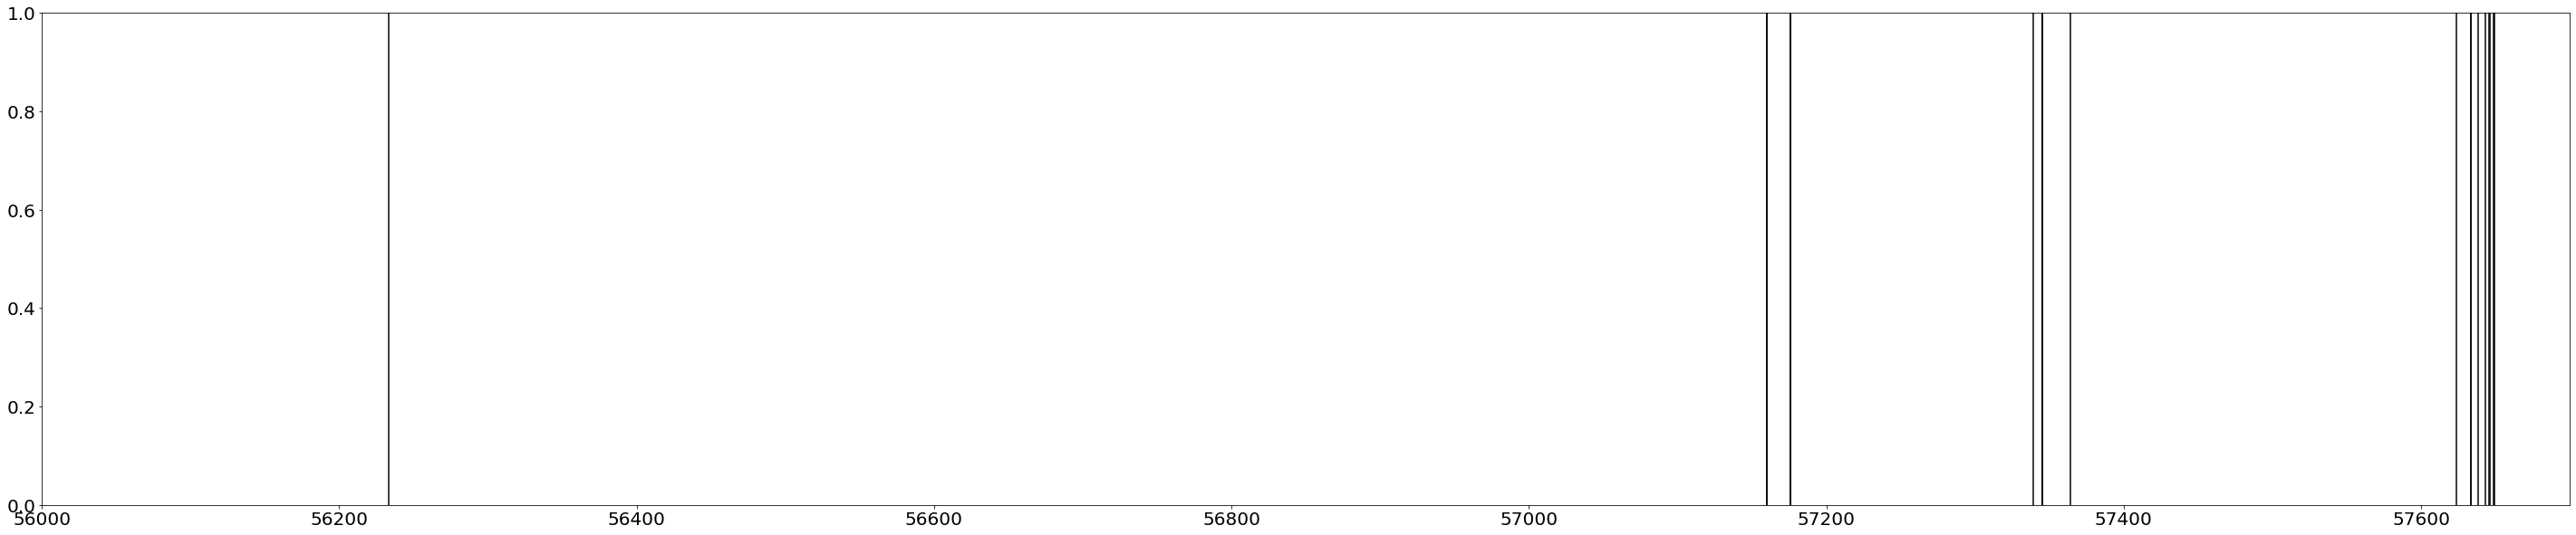

In [51]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(50,10))
for t in FRB_mjd_time:
    ax.axvline(t, c='k')

ax.set_xlim(56000,57700)
fig.patch.set_facecolor('white')
fig.savefig('/home/mkovacevich/public_html/mjd.png', bbox_inches='tight')